# 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。



In [13]:
import numpy as np

def logistic_hypothesis(X):
    np.random.seed(0)
    theta = np.random.rand(1,X.shape[1])
    hypothesis = 1/(1 + np.exp(-1 * (np.dot(X, theta.T))))
    return hypothesis

In [54]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
X = iris.data[50:150]
y = pd.DataFrame(iris.target[50:150])

y = y.replace({1:0, 2:1})
y = y.to_numpy().flatten()

logistic_hypothesis(X)

ones = np.ones((1,1))
theta = np.random.rand(1,X.shape[1])
theta = np.insert(theta, 0, ones).reshape(-1,1)

(logistic_hypothesis(X) - y).shape



(100,)

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。


In [ ]:
# 問題2
    def _gradient_descent(self, X, error, y):
        error = (error - y).reshape(-1,1) # shape(100,1) - shape(100,1)
        sum_error = np.sum(error * X, axis=0) #shape(100,5) * (100,1)をsumで縦方向に計算 (1,5)
        self.theta[0] = self.theta[0] - self.lr*(sum_error[0]/X.shape[0]) 
        for i in range(1, X.shape[1]):
             self.theta[i] = self.theta[i] - self.lr*(sum_error[i]/X.shape[0] + self.lamda*self.theta[i]/X.shape[0]) 

# 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。




In [192]:
'''
def predict(X):
    pred = logistic_hypothesis(X)
    pred = np.where(pred < 0.5, 0, 1)
    return pred

predict(X_train).ravel()
'''

'\ndef predict(X):\n    pred = logistic_hypothesis(X)\n    pred = np.where(pred < 0.5, 0, 1)\n    return pred\n\npredict(X_train).ravel()\n'

In [193]:
'''
def predict_proba(X):
    pred_0 = 1- logistic_hypothesis(X)
    pred_1 = logistic_hypothesis(X)
    pred_proba = np.hstack([pred_0, pred_1])
    return pred_proba

predict_proba(X_test)
'''

'\ndef predict_proba(X):\n    pred_0 = 1- logistic_hypothesis(X)\n    pred_1 = logistic_hypothesis(X)\n    pred_proba = np.hstack([pred_0, pred_1])\n    return pred_proba\n\npredict_proba(X_test)\n'

# 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


なお、この数式には正則化項が含まれています。


＊数式が見切れる場合、DIVERを全画面にして御覧ください。


In [17]:
def cost_function(X, y,lamda=0.01):
    theta = np.random.rand(1,X.shape[1])
    y = y.reshape(-1,1)
    cross_entropy = (1/X.shape[0]) * np.sum((-y * np.log(logistic_hypothesis(X))) - ((1- y) * np.log(1-logistic_hypothesis(X))))
    regularization_term = lamda/2*X.shape[0] * np.sum(theta**2)
    cost_loss =  (cross_entropy + regularization_term).tolist()
    return cost_loss

cost_function(X_test, y_test)
#(-y * np.log(logistic_hypothesis(X))).shape

4.983508244147409

In [303]:
# 検証用に調べたが、あまり間違っていなさそう。
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = iris.data[50:150]
y = pd.DataFrame(iris.target[50:150])

y = y.replace({1:0, 2:1})
y = y.to_numpy().flatten()

X_train, X_test, y_train, y_test = train_test_split(X,y)

model = LogisticRegression().fit(X_train, y_train)
pred_sklearn = model.predict(X_test)
pred_sklearn

log_loss(y_test, pred_sklearn)

2.7631021115928553

# 【問題5】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [304]:
# 合体版
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        self.lamda = 0.001
        self.list_train_loss = []
        self.list_val_loss = []
        
    # 問題１    
    def _logistic_hypothesis(self, X):
        z = np.dot(X, self.theta)
        y_hot = 1/(1 + np.exp(-z))
        return y_hot

    # 問題2
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        self.theta = np.random.rand(X.shape[1],1)
        
        # バイアスをthetaとX, X_valに追加
        if self.bias:
            # ブロードキャストで特徴量の先頭に１を追加
            X = np.insert(X, 0, 1, axis=1)
            ones = np.ones((1,1))
            self.theta = np.insert(self.theta, 0, ones) ###########
        
        # 訓練データを勾配計算からpredict〜cost_functionを計算
        for i in range(self.iter):
            error = self._logistic_hypothesis(X) #(75,1) 
            self._gradient_descent(X, error, y)
            #y_pred = self.predict_proba(X)[:,1]
            loss, _ = self.cost_function(X, y, error)
            self.list_train_loss.append(loss)
            
            if self.verbose:
            #verboseをTrueにした際は学習過程を出力
                print("{}/{}, train_loss {}".format(i+1, self.iter, loss))
        

        # テストデータを勾配計算からpredict〜cost_functionを計算
        if X_val is not None and y_val is not None:
            self.val_theta = np.random.rand(X_val.shape[1], 1)
            
            if self.bias:
                X_val = np.insert(X_val, 0, 1, axis=1)
                val_ones = np.ones((1,1))
                self.val_theta = np.insert(self.val_theta, 0, val_ones)
            
            for i in range(self.iter):
                error = self._logistic_hypothesis(X_val) # (25,1)
                self._gradient_descent(X_val, error, y_val)
                #y_val_pred = self.predict_proba(X_val)[:, 1]
                _, val_loss = self.cost_function(X_val, y_val, error)
                self.list_val_loss.append(val_loss)
        
                if self.verbose:
                #verboseをTrueにした際は学習過程を出力
                    print("{}/{}, test_loss {}".format(i+1, self.iter, val_loss))
             
            
    # 問題3
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """ 
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)    
            
        pred = self._logistic_hypothesis(X)
        pred = np.where(pred < 0.5, 0, 1)
        return pred
    
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        if self.bias:
            X = np.insert(X, 0, 1, axis=1)
            
        pred_proba = self._logistic_hypothesis(X)
        return pred_proba
    
    # 問題2
    def _gradient_descent(self, X, error, y):
        error = (error - y).reshape(-1,1) # shape(100,1) - shape(100,1)
        sum_error = np.sum(error * X, axis=0) #shape(100,5) * (100,1)をsumで縦方向に計算 (1,5)
        self.theta[0] = self.theta[0] - self.lr*(sum_error[0]/X.shape[0]) 
        for i in range(1, X.shape[1]):
             self.theta[i] = self.theta[i] - self.lr*(sum_error[i]/X.shape[0] + self.lamda*self.theta[i]/X.shape[0]) 
    
    
    # 問題4
    def cost_function(self, X,y, y_pred):
        y = y.reshape(-1,1)
        cross_entropy = 1/X.shape[0] * np.sum(-y * np.log(y_pred) - (1- y) * np.log(1-y_pred))
        regularization_term = self.lamda * np.sum(self.theta**2) / 2*X.shape[0]
        cost_loss =  cross_entropy + regularization_term
        self.loss = cost_loss
        self.val_loss = cost_loss
        return self.loss, self.val_loss


In [74]:
a = np.arange(0,5).reshape(1,5)
a[0] * 0.01
theta[0].shape 

(1,)

In [247]:
theta = np.random.rand(1,X.shape[1])
theta

a = np.arange(0,9).reshape(3,3)
b = np.arange(0,9).reshape(3,3)

print(np.sum(a*b))
print(a@b)

204
[[ 15  18  21]
 [ 42  54  66]
 [ 69  90 111]]


In [305]:
from sklearn.metrics import accuracy_score ,precision_score, recall_score, f1_score, confusion_matrix

X = iris.data[50:150]
y = pd.DataFrame(iris.target[50:150])

y = y.replace({1:0, 2:1})
y = y.to_numpy().flatten()

model_scratch = ScratchLogisticRegression(1000, 0.001, True, True)
model_scratch.fit(X_train, y_train, X_test, y_test)


1/1000, train_loss 491.05383923947323
2/1000, train_loss 489.7140161339745
3/1000, train_loss 488.37419529285614
4/1000, train_loss 487.0343767389592
5/1000, train_loss 485.6945605143414
6/1000, train_loss 484.3547466488428
7/1000, train_loss 483.0149351744716
8/1000, train_loss 481.67512612822475
9/1000, train_loss 480.3353195484127
10/1000, train_loss 478.99551547145376
11/1000, train_loss 477.65571393786513
12/1000, train_loss 476.3159149879967
13/1000, train_loss 474.9761186638255
14/1000, train_loss 473.63632500786474
15/1000, train_loss 472.296534063985
16/1000, train_loss 470.95674587906535
17/1000, train_loss 469.6169604997485
18/1000, train_loss 468.27717797569215
19/1000, train_loss 466.937398356697
20/1000, train_loss 465.5976216944822
21/1000, train_loss 464.2578480434335
22/1000, train_loss 462.91807745903714
23/1000, train_loss 461.57830999905644
24/1000, train_loss 460.2385457194327
25/1000, train_loss 458.8987846853881
26/1000, train_loss 457.55902695535633
27/1000, tra

850/1000, train_loss 52.52016032465716
851/1000, train_loss 52.52040192193424
852/1000, train_loss 52.52064374355827
853/1000, train_loss 52.52088578762252
854/1000, train_loss 52.52112805225594
855/1000, train_loss 52.52137053562253
856/1000, train_loss 52.52161323592069
857/1000, train_loss 52.52185615138245
858/1000, train_loss 52.52209928027301
859/1000, train_loss 52.52234262088994
860/1000, train_loss 52.522586171562665
861/1000, train_loss 52.52282993065186
862/1000, train_loss 52.52307389654878
863/1000, train_loss 52.52331806767475
864/1000, train_loss 52.52356244248062
865/1000, train_loss 52.52380701944607
866/1000, train_loss 52.524051797079224
867/1000, train_loss 52.52429677391601
868/1000, train_loss 52.52454194851964
869/1000, train_loss 52.524787319480154
870/1000, train_loss 52.52503288541384
871/1000, train_loss 52.525278644962775
872/1000, train_loss 52.525524596794305
873/1000, train_loss 52.52577073960062
874/1000, train_loss 52.5260170720982
875/1000, train_loss 

795/1000, test_loss 17.605985213426514
796/1000, test_loss 17.60610671125397
797/1000, test_loss 17.606228244189058
798/1000, test_loss 17.606349812225666
799/1000, test_loss 17.606471415357657
800/1000, test_loss 17.606593053578905
801/1000, test_loss 17.60671472688327
802/1000, test_loss 17.606836435264604
803/1000, test_loss 17.606958178716766
804/1000, test_loss 17.607079957233598
805/1000, test_loss 17.60720177080894
806/1000, test_loss 17.607323619436627
807/1000, test_loss 17.6074455031105
808/1000, test_loss 17.607567421824378
809/1000, test_loss 17.607689375572082
810/1000, test_loss 17.60781136434743
811/1000, test_loss 17.60793338814424
812/1000, test_loss 17.608055446956318
813/1000, test_loss 17.60817754077747
814/1000, test_loss 17.60829966960149
815/1000, test_loss 17.608421833422177
816/1000, test_loss 17.608544032233333
817/1000, test_loss 17.608666266028735
818/1000, test_loss 17.608788534802173
819/1000, test_loss 17.608910838547427
820/1000, test_loss 17.60903317725

In [306]:
# 評価の確認
pred = model_scratch.predict(X_test)
pred_proba = model_scratch.predict_proba(X_test)

print(pred.ravel())
print(pred_proba)
print("-"*50)
# 混合行列、正解率、適合率、再現率、F値
print(confusion_matrix(pred, y_test))
print(accuracy_score(pred, y_test))
print(precision_score(pred, y_test))
print(recall_score(pred, y_test))
print(f1_score(pred, y_test))

# スクラッチのクロスエントロピー
_, cost = model_scratch.cost_function(X_test, y_test, pred_proba)
print("log loss: {}".format(cost))

[1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1]
[0.66599294 0.662864   0.61469487 0.6154344  0.62124002 0.50996591
 0.50417035 0.51199084 0.49717478 0.52164983 0.58623628 0.57862637
 0.46258604 0.53349048 0.44209164 0.50265607 0.53083809 0.66671261
 0.46576207 0.65823374 0.61058535 0.55281494 0.5533495  0.50751661
 0.59426495]
--------------------------------------------------
[[ 4  0]
 [ 8 13]]
0.68
1.0
0.6190476190476191
0.7647058823529412
log loss: 17.631743915049086


In [308]:
# sklearnのロジスティック回帰と比較する
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

X = iris.data[50:150]
y = pd.DataFrame(iris.target[50:150])

y = y.replace({1:0, 2:1})
y = y.to_numpy().flatten()

model = LogisticRegression().fit(X_train, y_train)
pred_sk = model.predict(X_test)
pred_sk_proba = model.predict_proba(X_test)[:,1]

# predとprobaの確認
print(pred_sk)
print(pred_sk_proba)

# 混合行列、正解率、適合率、再現率、F値
print(confusion_matrix(pred, y_test))
print(accuracy_score(pred, y_test))
print(precision_score(pred, y_test))
print(recall_score(pred, y_test))
print(f1_score(pred, y_test))

# sklearnのクロスエントロピー

log_loss(y_test, pred)

[1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1]
[0.54645183 0.89594754 0.95960762 0.05054654 0.07560458 0.05182233
 0.45569541 0.97205303 0.01100832 0.17350702 0.25509376 0.0213071
 0.58417041 0.63124837 0.96149306 0.22305241 0.5059302  0.54943092
 0.02981109 0.01313685 0.99445254 0.48639945 0.272587   0.03704218
 0.58968991]
[[ 2  2]
 [12  9]]
0.44
0.8181818181818182
0.42857142857142855
0.5625


19.342098587916475

# 【問題6】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。


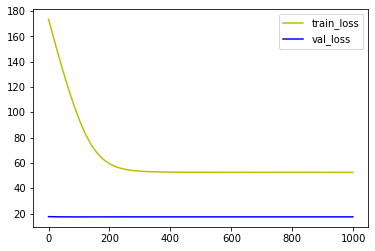

'\n考察\nvalはほとんど誤差に変化がないが、、、\n計算が正しいという前提の元でいうと\n訓練データと比べてテストデータが低いので、汎化性が高いと言える\n（※計算があっているのか？）\n'

In [252]:
import matplotlib.pyplot as plt

plt.plot(range(1000), model_scratch.list_train_loss, c='y', label='train_loss')  
plt.plot(range(1000), model_scratch.list_val_loss, c='b', label='val_loss')
plt.legend()
plt.show()

'''
考察
valはほとんど誤差に変化がないが、、、
計算が正しいという前提の元でいうと
訓練データと比べてテストデータが低いので、汎化性が高いと言える
（※計算があっているのか？）
'''

# 【問題7】決定領域の可視化
決定領域を可視化してください。


In [310]:
iris = load_iris()
X = pd.DataFrame(iris.data[50:150], columns=iris.feature_names)
y = pd.DataFrame(iris.target[50:150], columns=['target'])
X = X.loc[:, ['petal length (cm)','petal width (cm)']]
df = pd.concat([X,y], axis=1)
df[df['target'] == 1].iloc[:, 0]

iris.feature_names
#sepal length (cm)", "petal width (cm)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

(50, 50)
(50, 50)
(2500, 2)
[[0.60489515 0.59847922 0.59202937 ... 0.30314746 0.297522   0.29195719]
 [0.60911001 0.60271757 0.59628988 ... 0.3068929  0.30122798 0.29562303]
 [0.61330866 0.60694057 0.60053592 ... 0.31066399 0.30496009 0.29931543]
 ...
 [0.7783948  0.77374242 0.76902136 ... 0.49951949 0.49282712 0.48613732]
 [0.7814276  0.77682064 0.77214489 ... 0.50393661 0.49724385 0.49055208]
 [0.78443039 0.77986889 0.77523853 ... 0.5083531  0.50166101 0.49496832]]


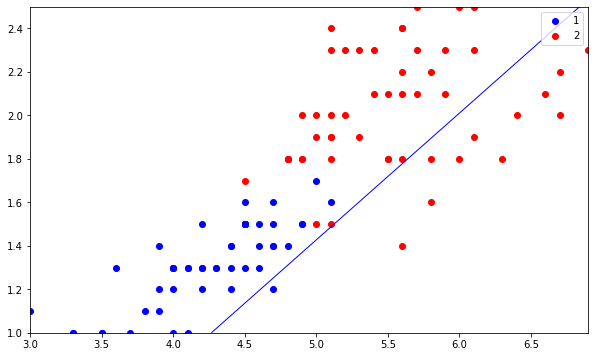

In [293]:
model = LogisticRegression().fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.scatter(df[df['target'] == 1].iloc[:, 0], df[df['target'] == 1].iloc[:, 1], color='b', label='1')
plt.scatter(df[df['target'] == 2].iloc[:, 0], df[df['target'] == 2].iloc[:, 1], color='r', label='2')
plt.legend()

x1_min, x1_max = X.iloc[:,0].min(), X.iloc[:,0].max(),
x2_min, x2_max = X.iloc[:,1].min(), X.iloc[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
print(xx1.shape)
print(xx2.shape)
grid = np.c_[xx1.ravel(), xx2.ravel()]
print(grid.shape)
probs = model_scratch.predict_proba(grid).reshape(xx1.shape)
print(probs)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='blue')
plt.show()

# これが限界っぽい
# 30hほど格闘してsethaが正しく訂正されないので、こちらで提出します。
# エラーの原因が判明できず下記にエラー現象を添付するので是非とも教えてください。

# 詳細
# thetaの次元が入力されたXに対し対応しないので起きているエラーです
# __init__、fit、predict、predict_probaにthetaを入れましたがエラーに対応しないです。。。

(50, 50)
(50, 50)
(2500, 2)


ValueError: shapes (2500,3) and (5,) not aligned: 3 (dim 1) != 5 (dim 0)

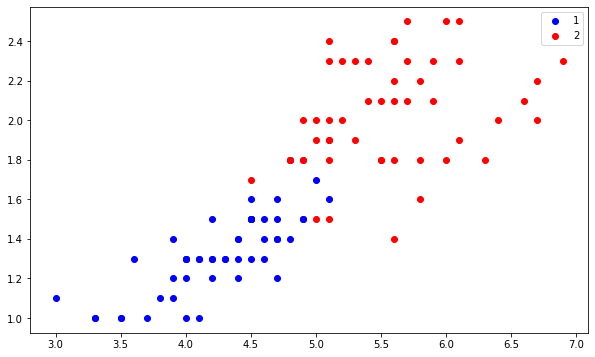

In [312]:
model = LogisticRegression().fit(X_train, y_train)

plt.figure(figsize=(10, 6))
plt.scatter(df[df['target'] == 1].iloc[:, 0], df[df['target'] == 1].iloc[:, 1], color='b', label='1')
plt.scatter(df[df['target'] == 2].iloc[:, 0], df[df['target'] == 2].iloc[:, 1], color='r', label='2')
plt.legend()

x1_min, x1_max = X.iloc[:,0].min(), X.iloc[:,0].max(),
x2_min, x2_max = X.iloc[:,1].min(), X.iloc[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
print(xx1.shape)
print(xx2.shape)
grid = np.c_[xx1.ravel(), xx2.ravel()]
print(grid.shape)
probs = model_scratch.predict_proba(grid).reshape(xx1.shape)
print(probs)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='blue')
plt.show()


# エラー詳細
# thetaの次元が入力されたXに対し対応しないので起きているエラーです
# __init__、fit、predict、predict_probaにthetaを入れましたがエラーに対応しないです。。。
# 更新式や、fitのthetaの位置を変更してもエラーが修正されないので教えてください。。。